<a href="https://colab.research.google.com/github/irythmgarg/DIABETES-PREDICTION/blob/main/DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES PREDICTION**

dataset link  https://www.dropbox.com/preview/diabetes.csv?scs=true

# **importing the dependencies**

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Loading of dataset**

In [60]:
df=pd.read_csv('/content/diabetes.csv'); # load data set
df.head(6)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [61]:
# number of rows and columns
df.shape

(768, 9)

In [62]:
df.describe() # statistical measures of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df.isnull().sum().sum() # number of missing values

0

In [64]:
df['Outcome'].value_counts()
# 0 ---> means no diabetes and 1 --> means diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

# **Separating data and labels**

In [65]:
y=df['Outcome']; # data
x=df.iloc[:,0:df.shape[1]-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# **spliting training and testing data**

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(x_train.shape);
print(x_test.shape);
print(y_train.shape);
print(y_test.shape);

(614, 8)
(154, 8)
(614,)
(154,)


In [76]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

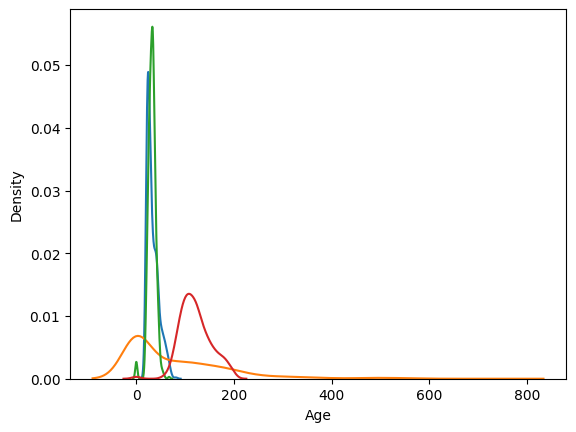

In [85]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['Insulin'])
sns.kdeplot(x_train['BMI'])
sns.kdeplot(x_train['Glucose'])


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

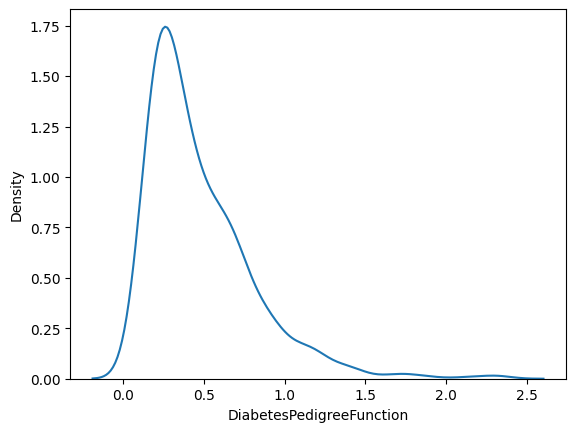

In [86]:
sns.kdeplot(x_train['DiabetesPedigreeFunction'])

# **STANDARB SCALING**
from the dataset we can see that some columns linke DiabetesPedigreeFunction	 have very small values and others like B.P or glucose have very large values as compared to them so we have to scale then on the same order ,so we are using standard scaler to make their values in approximate same scale

In [67]:
from sklearn.preprocessing import StandardScaler # import standard scaler class
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [68]:
 x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns) # scaled data of x_train


In [69]:
x_train_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.851355,-0.980131,-0.404784,-0.553973,-0.331319,-0.607678,0.310794,-0.792169
1,0.356576,0.161444,0.465368,0.392787,-0.526398,-0.302139,-0.116439,0.561034
2,-0.549372,-0.504474,-0.622322,1.213312,0.142444,0.372594,-0.764862,-0.707594
3,-0.851355,0.795653,-0.731091,-1.311380,-0.730766,-0.289408,0.262314,-0.369293
4,-1.153338,-0.821579,-0.296015,1.150195,0.244628,1.607482,-0.337630,-0.961320
...,...,...,...,...,...,...,...,...
609,-0.549372,0.415128,0.030292,-1.311380,-0.730766,-0.391255,0.195653,-0.876744
610,0.054593,-1.424076,-0.404784,-1.311380,-0.730766,0.258017,-0.261879,-0.707594
611,-0.851355,-0.758158,0.030292,1.213312,-0.730766,0.779980,-0.786072,-0.284718
612,1.866489,-0.314212,0.030292,0.392787,-0.730766,-0.569486,-1.019383,0.561034


In [70]:
 x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns) # scaled data set of x_test
 x_test_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.960541,1.207888,-0.296015,-1.311380,-0.730766,-0.582217,-0.555791,0.561034
1,1.866489,-1.677760,1.988135,0.140318,-0.275582,0.448979,-0.583061,1.153060
2,-0.549372,0.034603,0.356599,0.392787,1.127127,0.499902,0.016882,-0.623019
3,0.960541,-0.219081,-0.296015,-1.311380,-0.730766,-0.582217,0.771356,0.053583
4,-0.549372,-1.487497,-3.776623,-1.311380,-0.730766,-4.070459,-1.137554,-0.961320
...,...,...,...,...,...,...,...,...
149,-0.247390,-1.043552,-0.622322,-0.617090,-0.229135,-0.913218,-0.637601,-0.961320
150,-0.549372,-0.853289,0.356599,-0.175269,-0.117662,-0.047523,0.519865,-0.876744
151,-0.549372,-1.233814,-0.948629,0.077200,0.337522,-0.442178,3.701382,-0.707594
152,0.054593,2.000648,0.465368,1.150195,1.842416,0.639941,-0.646691,-0.200143


<Axes: xlabel='Age', ylabel='Density'>

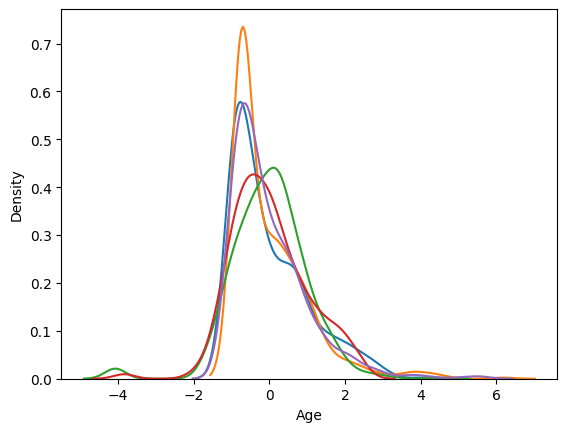

In [93]:
sns.kdeplot(x_train_scaled_df['Age'])
sns.kdeplot(x_train_scaled_df['Insulin'])
sns.kdeplot(x_train_scaled_df['BMI'])
sns.kdeplot(x_train_scaled_df['Glucose'])
sns.kdeplot(x_train_scaled_df['DiabetesPedigreeFunction'])

In [ ]:
# now ranges of their span lies on smae scale

In [71]:
lr=LogisticRegression() # making logistic regression object
lr.fit(x_train,y_train) # fitting the training data without scaling

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
672,10,68,106,23,49,35.5,0.285,47
700,2,122,76,27,200,35.9,0.483,26
630,7,114,64,0,0,27.4,0.732,34
81,2,74,0,0,0,0.0,0.102,22
...,...,...,...,...,...,...,...,...
32,3,88,58,11,54,24.8,0.267,22
637,2,94,76,18,66,31.6,0.649,23
593,2,82,52,22,115,28.5,1.699,25
425,4,184,78,39,277,37.0,0.264,31


# **Accuracy on test Data without Scaling**

In [73]:
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7142857142857143

# ** Accuracy on test Data with Scaling **

In [94]:
lr2=LogisticRegression()  # making second logistic regression object
lr2.fit(x_train_scaled_df,y_train) # fitting the training data with scaling
y_pred2=lr2.predict(x_test_scaled_df)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7142857142857143